## Data Cleaning

This notebook is for preliminary data exploring, EDA and Data Cleaning


In [1]:
# Import necessary libraries, and load dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Data/Terry_Stops.csv')


/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(20)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,7.726342e+09,20200000112069,1.280372e+10,Field Contact,-,6953,1968.0,M,White,White,Male,2020-04-02T00:00:00Z,19:28:18.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER",--DISTURBANCE - OTHER,911,NaN,N,N,North,N,N2
1,46 - 55,1.754430e+10,20210000007572,1.945610e+10,Field Contact,-,6678,1970.0,M,White,White,Male,2021-01-10T00:00:00Z,06:01:35.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NaN,N,N,North,U,U2
2,26 - 35,-1.000000e+00,20150000005079,8.832700e+04,Field Contact,None,6382,1958.0,M,Nat Hawaiian/Oth Pac Islander,White,Male,2015-09-30T00:00:00Z,16:14:00.0000000,-,-,-,NORTH PCT 2ND W - JOHN - PLATOON 1,N,N,-,-,-
3,-,3.130797e+10,20220000015393,3.130802e+10,Field Contact,-,6799,1976.0,M,Hispanic or Latino,Black or African American,Male,2022-01-19T00:00:00Z,13:34:08.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NaN,N,N,West,M,M3
4,26 - 35,7.727243e+09,20190000195849,8.258955e+09,Field Contact,-,6953,1968.0,M,White,-,Female,2019-05-31T00:00:00Z,16:06:48.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NaN,N,N,North,N,N3
5,36 - 45,7.729604e+09,20200000126437,1.292340e+10,Field Contact,-,6953,1968.0,M,White,White,Male,2020-04-15T00:00:00Z,17:21:44.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--THEFT - SHOPLIFT,ONVIEW,NaN,N,N,North,N,N2
6,26 - 35,-1.000000e+00,20180000000220,3.790060e+05,Field Contact,None,7575,1985.0,M,White,White,Male,2018-01-16T00:00:00Z,16:56:00.0000000,-,-,-,WEST PCT 2ND W - D/M RELIEF,N,N,-,-,-
7,56 and Above,-1.000000e+00,20170000106023,2.507350e+05,Offense Report,None,7700,1990.0,M,White,White,Male,2017-03-26T00:00:00Z,17:38:00.0000000,ORDER - VIOLATING DV COURT ORDER,--DV - ASSIST VICTIM BY COURT ORDER,911,SOUTH PCT 2ND W - ROBERT - PLATOON 2,N,N,South,R,R2
8,56 and Above,7.727772e+09,20220000069562,3.221367e+10,Arrest,-,7735,1991.0,M,White,Black or African American,Male,2022-03-20T00:00:00Z,17:01:33.0000000,DIST - DV - NO ASLT,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,NaN,Y,N,East,G,G3
9,26 - 35,-1.000000e+00,20190000112179,5.464940e+05,Offense Report,None,8303,1991.0,M,Hispanic or Latino,White,Male,2019-03-30T00:00:00Z,00:52:00.0000000,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER",ONVIEW,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,E,E2


In [6]:
df['Stop Resolution'].value_counts(normalize = True)

Field Contact               0.434666
Offense Report              0.303423
Arrest                      0.245291
Referred for Prosecution    0.013049
Citation / Infraction       0.003571
Name: Stop Resolution, dtype: float64

In [7]:
df['Arrest Flag'].value_counts(normalize = True)


N    0.901857
Y    0.098143
Name: Arrest Flag, dtype: float64

In [8]:
# Looking into the stop resolution description: resolutions of the stops as reported by the officer..
# Arrest Flag: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. 
# Arrest Flag Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
# Finding out which one column is best for being a target. 

In [9]:
# Decided to go with Stop Resolution as my target. And possibly using arrest flag as one of the important features..

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255477 entries, 0 to 2255476
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Subject Age Group         object 
 1   Subject ID                float64
 2   GO / SC Num               object 
 3   Terry Stop ID             float64
 4   Stop Resolution           object 
 5   Weapon Type               object 
 6   Officer ID                object 
 7   Officer YOB               float64
 8   Officer Gender            object 
 9   Officer Race              object 
 10  Subject Perceived Race    object 
 11  Subject Perceived Gender  object 
 12  Reported Date             object 
 13  Reported Time             object 
 14  Initial Call Type         object 
 15  Final Call Type           object 
 16  Call Type                 object 
 17  Officer Squad             object 
 18  Arrest Flag               object 
 19  Frisk Flag                object 
 20  Precinct                

In [11]:
# Defined potential features and temperary target: Arrest Flag. Drop irrelevant columns and make a new dataframe.

In [12]:
df.drop(columns = ['Subject ID','GO / SC Num','Terry Stop ID','Officer ID','Officer YOB','Officer Gender','Officer Race','Reported Date',
                   'Reported Time','Call Type','Officer Squad','Precinct','Sector','Beat'], inplace = True)

In [13]:
df.columns # Making sure we have all columns that we want

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type',
       'Subject Perceived Race', 'Subject Perceived Gender',
       'Initial Call Type', 'Final Call Type', 'Arrest Flag', 'Frisk Flag'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255477 entries, 0 to 2255476
Data columns (total 9 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Subject Age Group         object
 1   Stop Resolution           object
 2   Weapon Type               object
 3   Subject Perceived Race    object
 4   Subject Perceived Gender  object
 5   Initial Call Type         object
 6   Final Call Type           object
 7   Arrest Flag               object
 8   Frisk Flag                object
dtypes: object(9)
memory usage: 154.9+ MB


In [15]:
# All columns are strings, I will use OneHotEncoder after we cleaned the missing values and train-test-split the dataset!

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255477 entries, 0 to 2255476
Data columns (total 9 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Subject Age Group         object
 1   Stop Resolution           object
 2   Weapon Type               object
 3   Subject Perceived Race    object
 4   Subject Perceived Gender  object
 5   Initial Call Type         object
 6   Final Call Type           object
 7   Arrest Flag               object
 8   Frisk Flag                object
dtypes: object(9)
memory usage: 154.9+ MB


In [17]:
df.isnull().sum() # checking missing values for all columns

Subject Age Group           0
Stop Resolution             5
Weapon Type                 5
Subject Perceived Race      5
Subject Perceived Gender    5
Initial Call Type           5
Final Call Type             5
Arrest Flag                 5
Frisk Flag                  5
dtype: int64

In [18]:
df.dropna(axis = 0, inplace = True)

In [19]:
df.isnull().sum()

Subject Age Group           0
Stop Resolution             0
Weapon Type                 0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Arrest Flag                 0
Frisk Flag                  0
dtype: int64

In [20]:
# Looking into each column to see any strange outputs. Do more cleaning

In [21]:
df['Subject Age Group'].value_counts(normalize = True)

26 - 35         0.334283
36 - 45         0.218391
18 - 25         0.194363
46 - 55         0.127953
56 and Above    0.052107
1 - 17          0.038319
-               0.034585
Name: Subject Age Group, dtype: float64

In [22]:
df['Stop Resolution'].value_counts(normalize = True)

Field Contact               0.434666
Offense Report              0.303423
Arrest                      0.245291
Referred for Prosecution    0.013049
Citation / Infraction       0.003571
Name: Stop Resolution, dtype: float64

In [23]:
df['Weapon Type'].value_counts(normalize = True)

None                                    0.583809
-                                       0.354268
Lethal Cutting Instrument               0.026583
Knife/Cutting/Stabbing Instrument       0.019137
Handgun                                 0.006345
Blunt Object/Striking Implement         0.002532
Firearm Other                           0.001792
Firearm                                 0.001396
Other Firearm                           0.000898
Club, Blackjack, Brass Knuckles         0.000880
Mace/Pepper Spray                       0.000878
Firearm (unk type)                      0.000269
Taser/Stun Gun                          0.000254
None/Not Applicable                     0.000250
Fire/Incendiary Device                  0.000207
Rifle                                   0.000161
Club                                    0.000161
Shotgun                                 0.000072
Automatic Handgun                       0.000036
Personal Weapons (hands, feet, etc.)    0.000035
Blackjack           

In [24]:
# Observation: 58.4% of the individuals at a terry stop have no weapons
# Going to group weapons to: No Weapons, Firearm, Knife/Cutting/Stabbing Instrument, blunt/objects, 
# sprays, Taser/Stun Gun, Fire/Incendiary Device, 'Club, Blackjack, Brass Knuckles', and 'Unknown'


In [25]:
df['Weapon Type'].replace({'None':'No Weapons',
                           'None/Not Applicable':'No Weapons',
                           'Personal Weapons (hands, feet, etc.)':'No Weapons'}, inplace = True)

In [26]:
df['Weapon Type'].replace({'-':'Unknown'}, inplace = True)

In [27]:
df['Weapon Type'].replace({'Brass Knuckles':'Club, Blackjack, Brass Knuckles',
                           'Blackjack': 'Club, Blackjack, Brass Knuckles',
                           'Club': 'Club, Blackjack, Brass Knuckles',
                           'Automatic Handgun': 'Firearm',
                           'Shotgun': 'Firearm',
                           'Rifle':'Firearm',
                           'Firearm (unk type)': 'Firearm',
                           'Other Firearm': 'Firearm',
                           'Firearm Other':'Firearm',
                           'Handgun':'Firearm',
                           'Lethal Cutting Instrument':'Knife/Cutting/Stabbing Instrument',
                           
                           
                          }, inplace = True)

In [28]:
df['Weapon Type'].value_counts(normalize = True)

No Weapons                           0.584094
Unknown                              0.354268
Knife/Cutting/Stabbing Instrument    0.045720
Firearm                              0.010970
Blunt Object/Striking Implement      0.002532
Club, Blackjack, Brass Knuckles      0.001076
Mace/Pepper Spray                    0.000878
Taser/Stun Gun                       0.000254
Fire/Incendiary Device               0.000207
Name: Weapon Type, dtype: float64

In [29]:
df['Subject Age Group'].replace({'-':'Unknown'}, inplace = True)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

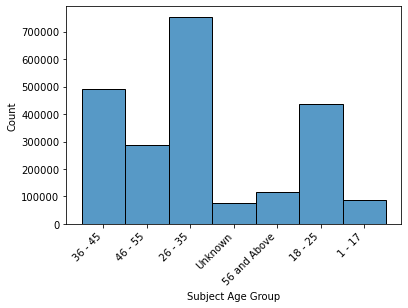

In [31]:
sns.histplot(df['Subject Age Group'])
plt.xticks(rotation=45, ha='right')

In [32]:
df['Stop Resolution'].value_counts(normalize = True)

Field Contact               0.434666
Offense Report              0.303423
Arrest                      0.245291
Referred for Prosecution    0.013049
Citation / Infraction       0.003571
Name: Stop Resolution, dtype: float64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

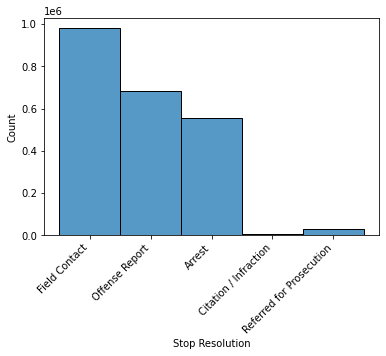

In [33]:
sns.histplot(df['Stop Resolution'])
plt.xticks(rotation=45, ha='right')

In [34]:
# Converting Stop resolution "Arrest" to 1, and the other categories to 0. This will be our binary target

In [35]:
df['Stop Resolution'] = df['Stop Resolution'].replace('Arrest', 1)
df['Stop Resolution'] = df['Stop Resolution'].replace('Field Contact', 0)
df['Stop Resolution'] = df['Stop Resolution'].replace('Offense Report', 0)
df['Stop Resolution'] = df['Stop Resolution'].replace('Citation / Infraction', 0)
df['Stop Resolution'] = df['Stop Resolution'].replace('Referred for Prosecution', 0)

In [36]:
df['Stop Resolution'].value_counts(normalize= True)

0    0.754709
1    0.245291
Name: Stop Resolution, dtype: float64

In [37]:
## NOW OUR TARGET IS BINARY!!!##

In [38]:
# Clean 'Subject Percerived Race' column:

In [39]:
df['Subject Perceived Race'].value_counts()

White                                        1107993
Black or African American                     669560
Unknown                                       153961
Asian                                          75997
-                                              73209
Hispanic                                       68049
American Indian or Alaska Native               62997
Multi-Racial                                   32707
Other                                           6141
Native Hawaiian or Other Pacific Islander       4818
DUPLICATE                                         40
Name: Subject Perceived Race, dtype: int64

In [40]:
# Combine 'Unknown' and '-', remove 'DUPLICATE'.

In [41]:
df['Subject Perceived Race'].replace({'-':'Unknown'}, inplace = True)

In [42]:
df = df [ df['Subject Perceived Race'] != 'DUPLICATE' ]

In [43]:
df['Subject Perceived Race'].value_counts()

White                                        1107993
Black or African American                     669560
Unknown                                       227170
Asian                                          75997
Hispanic                                       68049
American Indian or Alaska Native               62997
Multi-Racial                                   32707
Other                                           6141
Native Hawaiian or Other Pacific Islander       4818
Name: Subject Perceived Race, dtype: int64

In [44]:
# Clean 'Subject Percerived Gender' column:

In [45]:
df['Subject Perceived Gender'].value_counts()

Male                                                         1777878
Female                                                        450613
Unable to Determine                                            13196
-                                                               9679
Unknown                                                         2953
Gender Diverse (gender non-conforming and/or transgender)       1113
Name: Subject Perceived Gender, dtype: int64

In [46]:
df['Subject Perceived Gender'].replace({'Unable to Determine': 'Unknown',
                                        '-': 'Unknown'}, inplace = True)

In [47]:
df['Subject Perceived Gender'].value_counts(normalize = True)

Male                                                         0.788265
Female                                                       0.199790
Unknown                                                      0.011451
Gender Diverse (gender non-conforming and/or transgender)    0.000493
Name: Subject Perceived Gender, dtype: float64

In [48]:
# Clean 'Initial Call Type'

In [49]:
df['Initial Call Type'].value_counts()

-                                                    539003
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW           163815
SUSPICIOUS PERSON, VEHICLE OR INCIDENT               154690
DISTURBANCE, MISCELLANEOUS/OTHER                     114162
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)        99788
                                                      ...  
ANIMAL, REPORT - BITE                                    40
UNKNOWN - ANI/ALI - PAY PHNS (INCL OPEN LINE)            40
PREPLANNED EVENT                                         40
MISSING - ADULT                                          40
ALARM - PUBLIC TRANSPORTATION (CITY/STATE/COUNTY)        40
Name: Initial Call Type, Length: 172, dtype: int64

In [50]:
pd.set_option('display.max_rows', None)

In [51]:
df['Initial Call Type'].value_counts(normalize = True)

-                                                     0.238980
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW            0.072631
SUSPICIOUS PERSON, VEHICLE OR INCIDENT                0.068586
DISTURBANCE, MISCELLANEOUS/OTHER                      0.050616
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)        0.044243
TRESPASS                                              0.040244
SHOPLIFT - THEFT                                      0.030522
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)             0.029338
FIGHT - IP - PHYSICAL (NO WEAPONS)                    0.026297
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)        0.023665
AUTO RECOVERY                                         0.019488
BURG - IP/JO - RES (INCL UNOCC STRUCTURES)            0.019449
ROBBERY - IP/JO (INCLUDES STRONG ARM)                 0.019336
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)         0.017973
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)      0.017744
TRAFFIC STOP - OFFICER INITIATED ONVIEW               0

In [52]:
df['Final Call Type'].value_counts(normalize = True)

-                                                     2.389799e-01
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              8.970078e-02
--PROWLER - TRESPASS                                  7.079176e-02
--DISTURBANCE - OTHER                                 5.855597e-02
--ASSAULTS, OTHER                                     4.969070e-02
--WARRANT SERVICES - FELONY                           3.510414e-02
--THEFT - SHOPLIFT                                    2.834934e-02
--DV - ARGUMENTS, DISTURBANCE (NO ARREST)             2.789222e-02
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE             2.602916e-02
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)          2.579284e-02
--ASSAULTS - HARASSMENT, THREATS                      2.381761e-02
--NARCOTICS - OTHER                                   2.319999e-02
--WARRANT SERVICES - MISDEMEANOR                      2.089001e-02
--CRISIS COMPLAINT - GENERAL                          1.936569e-02
--THEFT - ALL OTHER                                   1.734834

In [53]:
#### Need to work on cleaning this messy column!!!!!***

In [54]:
df['Final Call Type'].value_counts()

-                                                     539003
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              202314
--PROWLER - TRESPASS                                  159666
--DISTURBANCE - OTHER                                 132069
--ASSAULTS, OTHER                                     112074
--WARRANT SERVICES - FELONY                            79175
--THEFT - SHOPLIFT                                     63940
--DV - ARGUMENTS, DISTURBANCE (NO ARREST)              62909
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE              58707
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)           58174
--ASSAULTS - HARASSMENT, THREATS                       53719
--NARCOTICS - OTHER                                    52326
--WARRANT SERVICES - MISDEMEANOR                       47116
--CRISIS COMPLAINT - GENERAL                           43678
--THEFT - ALL OTHER                                    39128
--AUTOMOBILES - RECOVERY (THEFT)                       36578
--PROPERTY DEST (DAMG)  

In [55]:
df['Final Call Type'] = df['Final Call Type'].str.replace(r'^--', '', regex=True)

In [56]:
df['Final Call Type'] = df['Final Call Type'].str.replace(r'^-', '', regex=True)

In [57]:
df['Final Call Type'].value_counts().sort_index()

                                                      539003
ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)                3306
ALARM-COMM ROBB (BANK, PANIC, DURESS)                    406
ALARM-OTHER (VARDA,PDT,FIRE,LOCAL,METRO,ETC))            242
ALARM-RESIDENTIAL BURG                                   688
ALARM-RESIDENTIAL PANIC OR DURESS                        162
ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS                728
ANIMAL COMPLAINT - NOISE,STRAY,BITE                      447
ARSON, BOMBS, EXPLO - ARSON                             2637
ARSON, BOMBS, EXPLO - RECKLESS BURNING                  6874
ARSON,BOMBS,EXPLO - BOMBS, EXPLO,LARGE FIREWORKS         365
ASLT - DV                                                121
ASLT - IP/JO - DV                                         42
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)            44
ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS)                121
ASSAULTS - FIREARM INVOLVED                            14474
ASSAULTS - GANG RELATED 

In [58]:
df['Final Call Type'].nunique()

191

In [59]:
## so this final call type has 191 unique values. I am not so sure how it will contribute to logistic regression modeling process but we will see! I will leave them as it is.

In [60]:
df['Frisk Flag'].value_counts(normalize = True)

N    0.758018
Y    0.233404
-    0.008578
Name: Frisk Flag, dtype: float64

In [61]:
df['Frisk Flag'].replace({'-':'Unknown'}, inplace = True)

In [62]:
df['Arrest Flag'].value_counts(normalize = True)

N    0.901856
Y    0.098144
Name: Arrest Flag, dtype: float64

In [63]:
df.head()

,Subject Age Group,Stop Resolution,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Arrest Flag,Frisk Flag
0,36 - 45,0,Unknown,White,Male,"DISTURBANCE, MISCELLANEOUS/OTHER",DISTURBANCE - OTHER,N,N
1,46 - 55,0,Unknown,White,Male,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N
2,26 - 35,0,No Weapons,White,Male,-,,N,N
3,Unknown,0,Unknown,Black or African American,Male,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N
4,26 - 35,0,Unknown,Unknown,Female,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N


In [64]:
# Change N and Y in the Arrest Flag column to be 0 and 1

In [65]:
df['Arrest Flag'].replace({'N':0,
                          'Y':1},
                         inplace = True)

In [66]:
# Change N and Y in the Frisk Flag column to be 0 and 1

In [67]:
df['Frisk Flag'].replace({'N':'0',
                          'Y':'1'},
                         inplace = True)

In [68]:
df['Frisk Flag'].value_counts()

0          1709657
1           526427
Unknown      19348
Name: Frisk Flag, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255432 entries, 0 to 2255471
Data columns (total 9 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Subject Age Group         object
 1   Stop Resolution           int64 
 2   Weapon Type               object
 3   Subject Perceived Race    object
 4   Subject Perceived Gender  object
 5   Initial Call Type         object
 6   Final Call Type           object
 7   Arrest Flag               int64 
 8   Frisk Flag                object
dtypes: int64(2), object(7)
memory usage: 172.1+ MB


In [70]:
df['Initial Call Type'].replace({'-':'Unknown'}, inplace = True)

In [71]:
df['Final Call Type'].replace({'':'Unknown'}, inplace = True)

In [72]:
df.head()

,Subject Age Group,Stop Resolution,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Arrest Flag,Frisk Flag
0,36 - 45,0,Unknown,White,Male,"DISTURBANCE, MISCELLANEOUS/OTHER",DISTURBANCE - OTHER,0,0
1,46 - 55,0,Unknown,White,Male,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,0,0
2,26 - 35,0,No Weapons,White,Male,Unknown,Unknown,0,0
3,Unknown,0,Unknown,Black or African American,Male,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,0,0
4,26 - 35,0,Unknown,Unknown,Female,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,0,0


In [73]:
# Make first cleaned dataframe with all the necessary columns!

In [74]:
df.to_csv('./Data/Cleaned_Terry_Stops.csv')